Marklin Example 1: Compute and trace Taylor states in an elongated cylinder {#doc_marklin_ex1}
==========
In this example we compute the Taylor state in a R=1, L=10 cylinder with Marklin and then demonstrate tracing the magnetic field and the vector potential.

In [1]:
import os
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(6,6)
plt.rcParams['font.weight']='bold'
plt.rcParams['axes.labelweight']='bold'
plt.rcParams['lines.linewidth']=2
plt.rcParams['lines.markeredgewidth']=2
%matplotlib inline
%config InlineBackend.figure_format = "retina"

### Load Marklin library

To load the Marklin python module we need to tell python where to the module is located. This can be done either through the `PYTHONPATH` environment variable or using within a script using `sys.path.append()` as below, where we look for the environement variable `OFT_ROOTPATH` to provide the path to where the OpenFUSIONToolkit is installed (`/Applications/OFT` on macOS).

In [2]:
tokamaker_python_path = os.getenv('OFT_ROOTPATH')
if tokamaker_python_path is not None:
    sys.path.append(os.path.join(tokamaker_python_path,'python'))
from OpenFUSIONToolkit import OFT_env
from OpenFUSIONToolkit.Marklin import Marklin

## Create Marklin solver object

In [3]:
myOFT = OFT_env(nthreads=4)
taylor_solver = Marklin(myOFT)

#----------------------------------------------
Open FUSION Toolkit Initialized
Development branch:   plotting_reorg
Revision id:          454a9f5
Parallelization Info:
  Not compiled with MPI
  # of OpenMP threads =    4
Fortran input file    = /var/folders/52/n5qxh27n4w19qxzqygz2btbw0000gn/T/oft_12629/oftpyin                                                                                                                                      
XML input file        = none                                                                                                                                                                                                    
Integer Precisions    =    4   8
Float Precisions      =    4   8  16
Complex Precisions    =    4   8
LA backend            = native
#----------------------------------------------



## Load mesh

In [4]:
taylor_solver.setup_mesh(mesh_file='cyl10_mesh.h5')


**** Loading OFT mesh
  Mesh File = cyl10_mesh.h5

**** Generating grid level  1
  Generating domain linkage
  Generating boundary domain linkage
  Mesh statistics:
    Volume          =  3.125E+01
    Surface area    =  6.899E+01
    # of points     =    6867
    # of edges      =   43660
    # of faces      =   71594
    # of cells      =   34800
    # of boundary points =    1996
    # of boundary edges  =    5982
    # of boundary faces  =    3988
    # of boundary cells  =    3928
  Resolution statistics:
    hmin =  1.101E-01
    hrms =  2.077E-01
    hmax =  3.575E-01
  Surface grounded at vertex    1482



## Compute Taylor state (1 eigenmode) using 2nd order elements

In [5]:
taylor_solver.compute(1,2)


**** Creating Lagrange FE space
  Order  =    2
  Minlev =   -1


**** Creating Nedelec H1(Curl) FE space
  Order  =    2
  Minlev =   -1


Starting calculation of Taylor states

Starting CG eigensolver
     0 -1.403448E+04  1.169492E+06
     1  5.189970E+01  1.399993E+01
     2  3.246547E+01  5.472812E+00
     3  2.437834E+01  3.087897E+00
     4  1.989835E+01  2.529258E+00
     5  1.719913E+01  2.044715E+00
     6  1.546581E+01  1.712756E+00
     7  1.425042E+01  1.467008E+00
     8  1.325121E+01  1.335233E+00
     9  1.243883E+01  1.232988E+00
    10  1.174500E+01  1.235287E+00
    20  7.875742E+00  6.462273E-01
    30  6.168009E+00  5.820858E-01
    40  5.120522E+00  4.022171E-01
    50  4.469787E+00  2.946800E-01
    60  4.077718E+00  1.889831E-01
    70  3.852828E+00  1.035326E-01
    80  3.730811E+00  6.713483E-02
    90  3.634566E+00  7.282015E-02
   100  3.521793E+00  7.964931E-02
   110  3.424283E+00  6.476073E-02
   120  3.348261E+00  4.728159E-02
   130  3.298122E+00  3.06

## Save B-field and two different forms of vector potential
Here we save fields by building interpolators for each field and passing them to \ref OpenFUSIONToolkit.Marklin.Marklin.save_field "save_field()". The vector potential is saved twice with two different gauges:
  1) $A \times \hat{n} = 0$
  2) $A \cdot \hat{n} = 0$

In [6]:
taylor_solver.setup_io()
# Save vector potential with default gauge (A_t = 0 @ wall)
ainterp_obj = taylor_solver.get_ainterp(imode=1)
taylor_solver.save_field(ainterp_obj,'A')
# Save vector potential with B-field gauge (A_n = 0 @ wall)
ainterp_obj_zero_norm = taylor_solver.get_ainterp(imode=1,bn_gauge=True)
taylor_solver.save_field(ainterp_obj_zero_norm,'A_znorm')
# Save magnetic field
binterp_obj = taylor_solver.get_binterp(imode=1)
taylor_solver.save_field(binterp_obj,'B')
_ = taylor_solver.build_XDMF()


**** Creating Nedelec H0 FE space
  Order  =    3
  Minlev =    3


**** Creating Nedelec H1 FE space
  Order  =    2
  Minlev =    2

Starting CG solver
     0  0.000000E+00  0.000000E+00  1.360141E-02
     1 -5.435290E-04  2.547571E-01  3.605717E-03  1.415355E-02
     2 -5.890730E-04  2.135198E-01  3.168217E-03  1.483805E-02
     3 -6.154843E-04  1.525868E-01  2.738205E-03  1.794523E-02
     4 -6.281580E-04  1.225837E-01  1.520531E-03  1.240402E-02
     5 -6.319155E-04  1.165799E-01  9.860615E-04  8.458242E-03
     6 -6.331835E-04  1.153076E-01  6.079830E-04  5.272705E-03
     7 -6.336863E-04  1.149247E-01  4.600461E-04  4.003022E-03
     8 -6.339817E-04  1.149014E-01  4.078858E-04  3.549877E-03
     9 -6.342458E-04  1.151900E-01  3.521885E-04  3.057457E-03
    10 -6.344469E-04  1.152135E-01  2.909402E-04  2.525226E-03
    20 -6.349344E-04  1.136196E-01  5.440595E-05  4.788429E-04
    30 -6.349477E-04  1.138680E-01  9.754402E-06  8.566414E-05
    40 -6.349482E-04  1.138708E-01  1.46

## Trace magnetic field and vector potential
**Note:** Vector potential with $A \cdot \hat{n} = 0$ is used for tracing, as otherwise most (all?) traces will quickly intersect the boundary.

In [7]:
import time
from scipy.integrate import odeint
def tracer_eval(y, t, interp_obj, fac):
    b = interp_obj.eval(y)
    if interp_obj.cell.value <= 0:
        return [0.0,0.0,0.0]
    else:
        return b*fac

In [8]:
t = np.linspace(0, 800, 1000)
# Trace magnetic field
t0 = time.perf_counter()
sol, infodict = odeint(tracer_eval, np.array([0.01,0.0,4.9]), t, args=(binterp_obj,1.0), atol=1.E-9, full_output=True)
t1 = time.perf_counter()
print("Time = {0:.3F} [s]".format(t1-t0))
print("Time/step = {0:.2E} [s]".format((t1-t0)/np.sum(infodict['nfe'])))
print()
# Trace vector potential
t0 = time.perf_counter()
sol2, infodict = odeint(tracer_eval, np.array([0.01,0.0,4.9]), t, args=(ainterp_obj_zero_norm,3.161823), atol=1.E-9, full_output=True)
t1 = time.perf_counter()
print("Time = {0:.3F} [s]".format(t1-t0))
print("Time/step = {0:.2E} [s]".format((t1-t0)/np.sum(infodict['nfe'])))

Time = 0.481 [s]
Time/step = 8.10E-09 [s]

Time = 0.267 [s]
Time/step = 7.98E-09 [s]


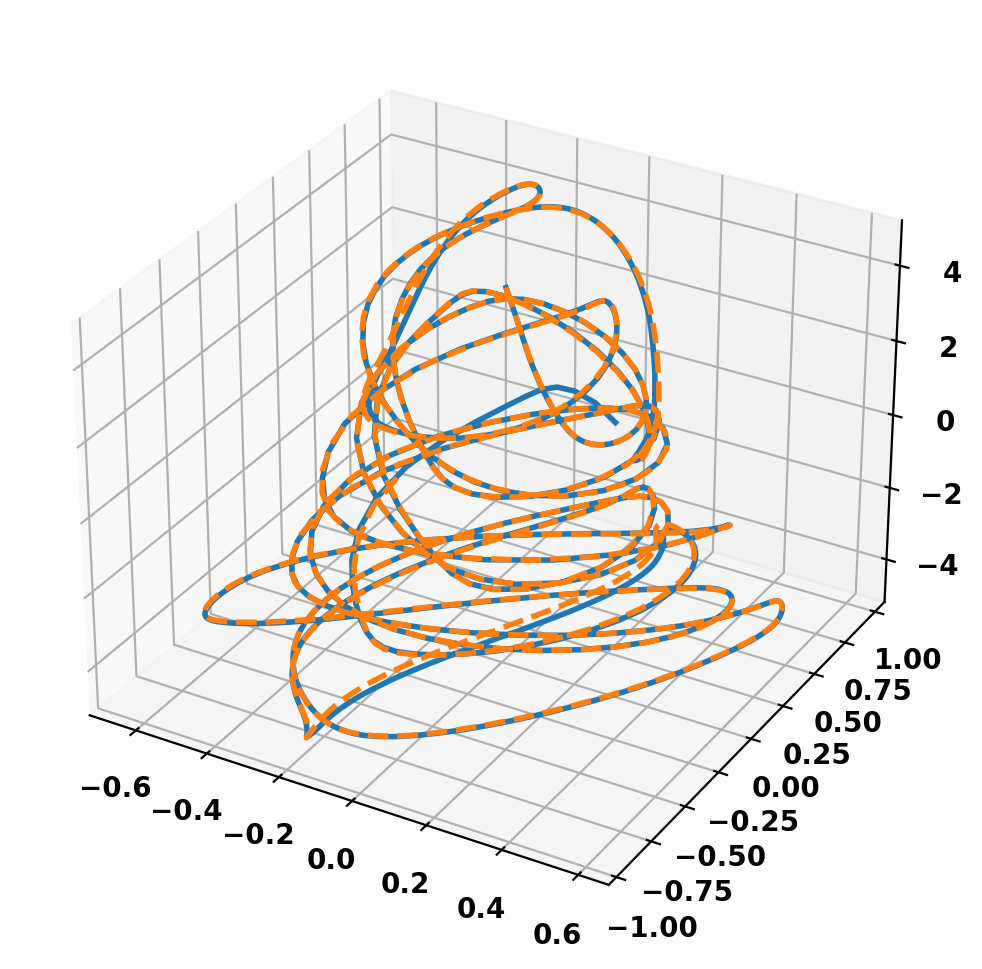

In [9]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(sol[:,0],sol[:,1],sol[:,2])
ax.plot(sol2[:,0],sol2[:,1],sol2[:,2],linestyle='--')
ax.set_aspect('auto')